# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer here

employee = pd.read_csv('Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [4]:
# your answer here-1st way
employee.groupby(['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# your answer here-2nd way
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [6]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [35]:
# shows average years of work experiencce and salary for each title
# employee.pivot_table(index=["Title"], values = ["Years","Salary"], aggfunc= np.mean)

# show number of employees in each title with years and salary
employee.pivot_table(index=["Title"], values = ["Name"], columns = ["Years","Salary"], aggfunc= 'count', fill_value = 0)


Name                  
Years        1  2     3  4  7  8
Salary      35 30 55 55 35 60 70
Title                           
VP           0  0  0  0  0  0  2
analyst      1  2  0  0  1  0  0
associate    0  0  1  1  0  1  0

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [18]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary","Name"], aggfunc={'Salary':np.mean,'Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [19]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc={'Salary':[np.median, np.min, np.max, np.std]})

""""
With the single samples for the VP roles and IT Associate: meedian,min,max are all the same and standard deviationo is NaN
The analyst title in both HR and IT has the same statistics
The one IT associate salary range is higher than Sales Associate
""""

Salary                       
                       amax  amin median       std
Department Title                                  
HR         VP          70.0  70.0   70.0       NaN
           analyst     35.0  30.0   32.5  3.535534
IT         VP          70.0  70.0   70.0       NaN
           analyst     35.0  30.0   32.5  3.535534
           associate   60.0  60.0   60.0       NaN
Sales      associate   55.0  55.0   55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [20]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Salary"],\
                     aggfunc={'Salary':[np.median, np.min, np.max, np.std]}, fill_value =  0)



Salary                      
                       amax amin median       std
Department Title                                 
HR         VP            70   70   70.0  0.000000
           analyst       35   30   32.5  3.535534
IT         VP            70   70   70.0  0.000000
           analyst       35   30   32.5  3.535534
           associate     60   60   60.0  0.000000
Sales      associate     55   55   55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [21]:
# your answer here
employee.pivot_table(index=["Department"], values=["Name","Salary"],\
                     aggfunc={'Salary':np.sum,'Name':'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [36]:
# your answer here
employee.pivot_table(index=["Department","Title"], values=["Years","Salary"],\
                     aggfunc={"Years":np.sum,'Salary':np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [43]:
# your answer here--Your custom function here

# new_mean expects a list, returns mean with maximum number removed, if list is one item, returns that item.

new_mean = lambda x: ((np.sum(x) - np.max(x)) / (len(x)-1)) if len(x)>1 else x[0]

# new_mean([1,2,3,4,5]) # -> 2.5

# new_mean([1]) # -> 1 

In [39]:
# your answer here
employee.pivot_table(index = ["Department"], values = ["Salary"], aggfunc = new_mean)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [44]:
# your answer here

fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [45]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [46]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [49]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

# correlation of .57 is moderately strong postive correlation.

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

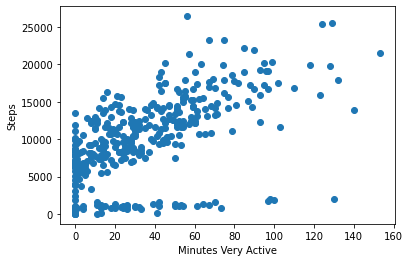

In [51]:
# your answer here
import matplotlib.pyplot as plt

plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.scatter(x = fitbit['Minutes Very Active'], y = fitbit['Steps']);

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
# generally as the number of Minutes Very Active increases, so does the number of Steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [52]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

#.076 is a pretty low correlation

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

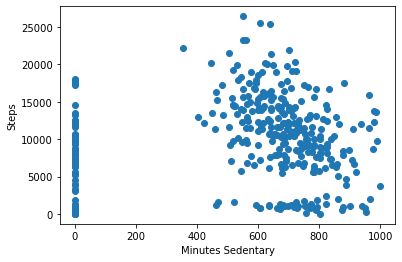

In [53]:
# your answer here
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.scatter(x = fitbit['Minutes Sedentary'], y = fitbit['Steps']);

In [22]:
# Your comment here
""""
There seems to be some junk data for 0 minutes Sedentary, and maybe some negative 
correlation between steps and minutes sedentary.
""""

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [54]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

#.13 is a moderately low correlation

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

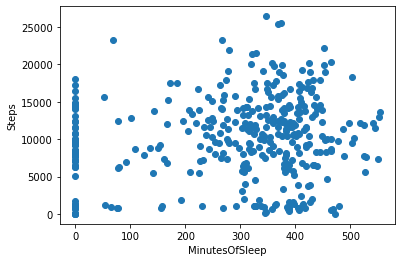

In [55]:
# your answer here
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.scatter(x = fitbit['MinutesOfSleep'], y = fitbit['Steps']);

#there is no obvious correlation

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [61]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()



In [63]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [66]:
# your answer here
cor_fit['Steps'].sort_values(ascending = False)

# Steps doesn't count so... Minutes Very Active, Floors and Calorie burned have a high positive correlation to Steps

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [67]:
# your answer here
time_grades = pd.read_csv("Time_Grades.csv")

In [68]:
#Print time_grades

time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

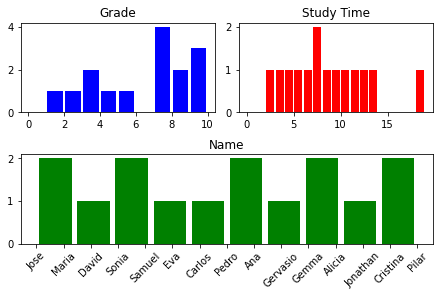

In [88]:
# your answer here
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Grade')
ax1.hist(x=time_grades['Grade'], bins = range(11),  color='b', rwidth=0.85)
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Study Time')
ax2.hist(x=time_grades['Study time'], bins = range(20), color='r', rwidth=0.85)


ax3 = fig.add_subplot(gs[1, :])
ax3.set_title("Name")
plt.setp(ax3.get_xticklabels(), rotation=45)
ax3.hist(x=time_grades['Name'], color='g',rwidth=0.85);

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [89]:
# your answer here-Pearson 
time_grades['Study time'].corr(time_grades['Grade'], method = 'pearson')

0.7980456073578858

In [90]:
## your answer here-Spearman
time_grades['Study time'].corr(time_grades['Grade'], method = 'spearman')

# yes there is a strong positive correlation between Study Time and Grade

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

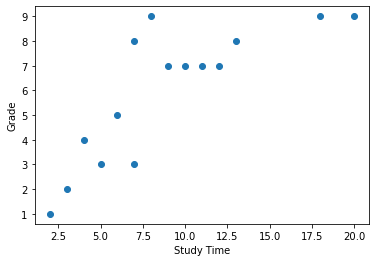

In [92]:
# your answer here
plt.xlabel("Study Time")
plt.ylabel("Grade")
plt.scatter(x = time_grades["Study time"], y = time_grades["Grade"]);



In [34]:
#your comment here

# Grade increases with Study Time

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here

""""
Pearson - Only calculates linear correlation

Spearman - Monotonic relationship between two varibles, they only have to change together, not neccesarily linearly.